In [1]:
import dynetworkx as dnx
from dynetworkx.classes.impulsedigraph import ImpulseDiGraph
import multiprocessing as mp
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
G = ImpulseDiGraph()
G = G.load_from_txt('incident_impulse.txt')

# Motif count

In [4]:
sequence = ((1, 2), (3, 2), (1, 2)) # 1 -> 2 then 3 -> 2 then 1 -> 2
delta = 7*86400 # 7 days with 86400 seconds in a day

dnx.count_temporal_motif(G, sequence, delta)

3277

# Motif dictionary

In [5]:
dnx.count_temporal_motif(G, sequence, delta, get_count_dict = True)

{('GRC', 'YUG', 'NOR', 'YUG', 'GRC', 'YUG'): 13,
 ('NOR', 'YUG', 'GRC', 'YUG', 'NOR', 'YUG'): 8,
 ('GRC', 'YUG', 'SPN', 'YUG', 'GRC', 'YUG'): 14,
 ('SPN', 'YUG', 'GRC', 'YUG', 'SPN', 'YUG'): 8,
 ('GRC', 'YUG', 'UKG', 'YUG', 'GRC', 'YUG'): 14,
 ('UKG', 'YUG', 'GRC', 'YUG', 'UKG', 'YUG'): 9,
 ('GRC', 'YUG', 'HUN', 'YUG', 'GRC', 'YUG'): 7,
 ('HUN', 'YUG', 'GRC', 'YUG', 'HUN', 'YUG'): 2,
 ('GRC', 'YUG', 'ITA', 'YUG', 'GRC', 'YUG'): 14,
 ('ITA', 'YUG', 'GRC', 'YUG', 'ITA', 'YUG'): 9,
 ('GRC', 'YUG', 'ICE', 'YUG', 'GRC', 'YUG'): 13,
 ('ICE', 'YUG', 'GRC', 'YUG', 'ICE', 'YUG'): 8,
 ('GRC', 'YUG', 'LUX', 'YUG', 'GRC', 'YUG'): 13,
 ('LUX', 'YUG', 'GRC', 'YUG', 'LUX', 'YUG'): 8,
 ('GRC', 'YUG', 'TUR', 'YUG', 'GRC', 'YUG'): 14,
 ('TUR', 'YUG', 'GRC', 'YUG', 'TUR', 'YUG'): 14,
 ('GRC', 'YUG', 'POL', 'YUG', 'GRC', 'YUG'): 7,
 ('POL', 'YUG', 'GRC', 'YUG', 'POL', 'YUG'): 2,
 ('GRC', 'YUG', 'NTH', 'YUG', 'GRC', 'YUG'): 14,
 ('NTH', 'YUG', 'GRC', 'YUG', 'NTH', 'YUG'): 14,
 ('GRC', 'YUG', 'POR', 'YUG', 

# Multiple motifs

In [6]:
motifs = [[((1,2),(3,2),(1,2)), ((1,2),(3,2),(2,1)), ((1,2),(3,2),(1,3)), ((1,2),(3,2),(3,1)), ((1,2),(3,2),(2,3)), ((1,2),(3,2),(3,2))],
          [((1,2),(2,3),(1,2)), ((1,2),(2,3),(2,1)), ((1,2),(2,3),(1,3)), ((1,2),(2,3),(3,1)), ((1,2),(2,3),(2,3)), ((1,2),(2,3),(3,2))],
          [((1,2),(3,1),(1,2)), ((1,2),(3,1),(2,1)), ((1,2),(3,1),(1,3)), ((1,2),(3,1),(3,1)), ((1,2),(3,1),(2,3)), ((1,2),(3,1),(3,2))],
          [((1,2),(1,3),(1,2)), ((1,2),(1,3),(2,1)), ((1,2),(1,3),(1,3)), ((1,2),(1,3),(3,1)), ((1,2),(1,3),(2,3)), ((1,2),(1,3),(3,2))],
          [((1,2),(2,1),(1,2)), ((1,2),(2,1),(2,1)), ((1,2),(2,1),(1,3)), ((1,2),(2,1),(3,1)), ((1,2),(2,1),(2,3)), ((1,2),(2,1),(3,2))],
          [((1,2),(1,2),(1,2)), ((1,2),(1,2),(2,1)), ((1,2),(1,2),(1,3)), ((1,2),(1,2),(3,1)), ((1,2),(1,2),(2,3)), ((1,2),(1,2),(3,2))]]

In [7]:
mot = [ seq for row in motifs for seq in row]
count_dict = list()
pool = mp.Pool(3)
results = pool.starmap_async(dnx.count_temporal_motif, [(G, seq, 7*86400, True) for seq in mot]).get()
pool.close()
count_dict=[results[0:6], results[6:12], results[12:18], results[18:24], results[24:30], results[30:36]]

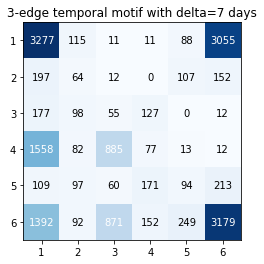

In [8]:
# 
count = list()
for row in range(len(count_dict)):
    row_count = list()
    for col in range(len(count_dict[row])):
        row_count.append(sum(count_dict[row][col].values()))
    count.append(row_count)
    
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(count, cmap='Blues')

column = range(7)
row = range(7)
ax.set_xticklabels(row)
ax.set_yticklabels(column)

for i in range(len(count)):
    for j in range(len(count[i])):
        if count[i][j] < np.average(count) + 400:
            text = ax.text(j, i, count[i][j],
                           ha="center", va="center", color='k')
        else:
            text = ax.text(j, i, count[i][j],
               ha="center", va="center", color='w')

ax.set_title("3-edge temporal motif with delta=7 days");

# Roles in motifs

In [10]:
def count_role(count_dict, row_i, col_i ,role_i):
    countries = list()
    count = list()

    for country in G.nodes():
        c = 0
        for key, co in count_dict[row_i][col_i].items():
            if country in key[role_i]:
                c = c + co
        countries.append(country)
        count.append(c)

    return pd.Series(count, countries)

def plot_role(count_dict, row_i, col_i, role_i1, role_i2, role_i3=None):
    role_1 = count_role(count_dict, row_i, col_i, role_i1).sort_values(ascending=False)
    role_2 = count_role(count_dict, row_i, col_i, role_i2).sort_values(ascending=False)
    if not role_i3 is None:
        role_3 = count_role(count_dict, row_i, col_i, role_i3).sort_values(ascending=False)
    
    fig = plt.figure(figsize=(16,10))
    fig.suptitle('Motif M{}{}'.format(row_i+1, col_i+1), fontsize=20, y=0.95)
    if not role_i3 is None:
        ax = fig.add_subplot(3,3,1)
        ax2 = fig.add_subplot(3,3,2, sharey=ax)
        ax3 = fig.add_subplot(3,3,3, sharey=ax)
        
        plt.setp(ax2.get_yticklabels(), visible=False)
        plt.setp(ax3.get_yticklabels(), visible=False)
        
        ax.tick_params(axis='x', labelsize=15 )
        ax2.tick_params(axis='x', labelsize=15 )
        ax3.tick_params(axis='x', labelsize=15 )
    else:
        ax = fig.add_subplot(3,2,1)
        ax2 = fig.add_subplot(3,2,2, sharey=ax)
        
        plt.setp(ax2.get_yticklabels(), visible=False)
        
        ax.tick_params(axis='x', labelsize=15 )
        ax2.tick_params(axis='x', labelsize=15 )
    
    ax.tick_params(axis='y', labelsize=12 )
    
    
    ax.bar(role_1.iloc[:5].index, role_1.iloc[:5])
    ax2.bar(role_2.iloc[:5].index, role_2.iloc[:5])
    if not role_i3 is None:
        ax3.bar(role_3.iloc[:5].index, role_3.iloc[:5])
    
    ax.set_title('Role 1', fontsize = 17)
    ax2.set_title('Role 2', fontsize= 17)
    if not role_i3 is None:
        ax3.set_title('Role 3', fontsize=17)

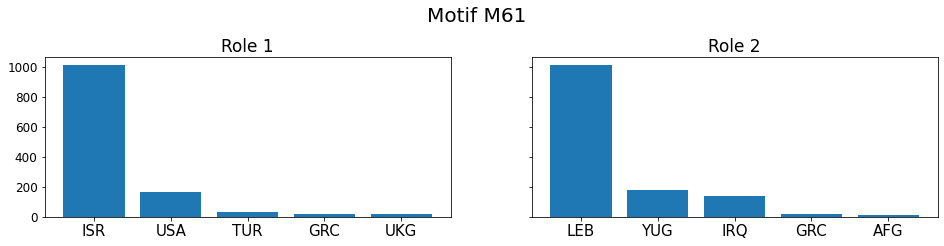

In [11]:
plot_role(count_dict, 5, 0, 0, 1)

# Different delta intervals

In [15]:
## count motifs at different delta intervals
day_delta = [3, 7, 30, 120]
def different_delta(G):
    count0 = list()
    
    for k in range(len(day_delta)):
        count_dict = list()
        pool = mp.Pool(3)
        results = pool.starmap_async(dnx.count_temporal_motif, [(G, seq, day_delta[k]*86400, True) for seq in mot]).get()
        pool.close()
        count_dict=[results[0:6], results[6:12], results[12:18], results[18:24], results[24:30], results[30:36]]

        count = list()
        for row in range(len(count_dict)):
            row_count = list()
            for col in range(len(count_dict[row])):
                row_count.append(sum(count_dict[row][col].values()))
            count.append(row_count)

        count0.append(count)
    
    return count0

def plot_interval_motifs(count0):
    diffcount = list()
    diffcount.append(np.array(count0[0]))
    diffcount.append(np.array(count0[1])-np.array(count0[0]))
    diffcount.append(np.array(count0[2])-np.array(count0[1]))
    diffcount.append(np.array(count0[3])-np.array(count0[2]))

    fig = plt.figure(figsize=(8, 8))
    for k in range(len(diffcount)):
        diff = diffcount[k]
        ax = fig.add_subplot(2,2,k+1)
        ax.imshow(diff, cmap='Blues')

        column = range(7)
        row = range(7)
        ax.set_xticklabels(row)
        ax.set_yticklabels(column)

        if k == 3:
            for i in range(len(diff)):
                for j in range(len(diff[i])):
                    if diff[i][j] < np.average(diff) + 10000:
                        text = ax.text(j, i, str(np.round(diff[i][j]/1000,1)) +'K', ha="center", va="center", color='k')
                    else:
                        text = ax.text(j, i, str(np.round(diff[i][j]/1000,1)) +'K', ha="center", va="center", color='w')
        else:
            for i in range(len(diff)):
                for j in range(len(diff[i])):
                    if diff[i][j] < np.average(diff) + 300:
                        text = ax.text(j, i, diff[i][j], ha="center", va="center", color='k')
                    else:
                        text = ax.text(j, i, diff[i][j], ha="center", va="center", color='w')
                    
        if k == 0:
            ax.set_title("delta interval=[{}, {}] days".format(0, day_delta[k]))
        else:
            ax.set_title("delta interval=({}, {}] days".format(day_delta[k-1], day_delta[k]))

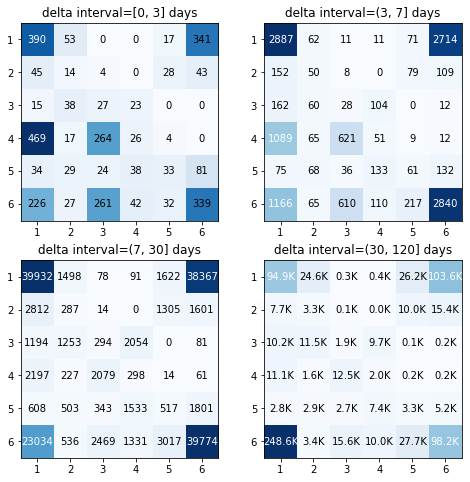

In [16]:
count0 = different_delta(G)
plot_interval_motifs(count0)